In [1]:
!pip install xgboost shap

    100% |████████████████████████████████| 501kB 688kB/s 
    100% |████████████████████████████████| 225kB 1.5MB/s 
    100% |████████████████████████████████| 51kB 863kB/s 
  Running setup.py bdist_wheel for xgboost ... done
  Stored in directory: /home/jaivarsan/.cache/pip/wheels/4e/6d/1d/0bc23240225fe411315d8abb5d4521b9ff002493ff77515ccc
  Running setup.py bdist_wheel for shap ... done
  Stored in directory: /home/jaivarsan/.cache/pip/wheels/eb/01/be/c5eb5837fdfe6f908e87db849c896ce889d0e3d465ae1eb0c6
  Running setup.py bdist_wheel for iml ... done
  Stored in directory: /home/jaivarsan/.cache/pip/wheels/9c/07/52/53ad784db16f282fda909719afc206b833db3121fbb0f1f176
Successfully built xgboost shap iml
You are using pip version 9.0.1, however version 10.0.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [2]:
import shap
import xgboost
from sklearn.model_selection import train_test_split
import matplotlib.pylab as plt

In [3]:
X,y = shap.datasets.nhanesi()

xgb_full = xgboost.DMatrix(X, label=y)

# create a train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)
xgb_train = xgboost.DMatrix(X_train, label=y_train)
xgb_test = xgboost.DMatrix(X_test, label=y_test)

In [4]:
# use validation set to choose # of trees
params = {
    "eta": 0.002,
    "max_depth": 3,
    "objective": "survival:cox",
    "subsample": 0.5
}
model_train = xgboost.train(params, xgb_train, 10000, evals = [(xgb_test, "test")], verbose_eval=1000)

[0]	test-cox-nloglik:7.26952
[1000]	test-cox-nloglik:6.55648
[2000]	test-cox-nloglik:6.48783
[3000]	test-cox-nloglik:6.47157
[4000]	test-cox-nloglik:6.46717
[5000]	test-cox-nloglik:6.46661
[6000]	test-cox-nloglik:6.46735
[7000]	test-cox-nloglik:6.46837
[8000]	test-cox-nloglik:6.47036
[9000]	test-cox-nloglik:6.47347
[9999]	test-cox-nloglik:6.47598


In [5]:
# train final model on the full data set
params = {
    "eta": 0.002,
    "max_depth": 3, 
    "objective": "survival:cox",
    "subsample": 0.5
}
model = xgboost.train(params, xgb_full, 5000, evals = [(xgb_full, "test")], verbose_eval=1000)

[0]	test-cox-nloglik:8.88073
[1000]	test-cox-nloglik:8.17256
[2000]	test-cox-nloglik:8.08609
[3000]	test-cox-nloglik:8.04917
[4000]	test-cox-nloglik:8.02488
[4999]	test-cox-nloglik:8.00527


In [6]:
def c_statistic_harrell(pred, labels):
    total = 0
    matches = 0
    for i in range(len(labels)):
        for j in range(len(labels)):
            if labels[j] > 0 and abs(labels[i]) > labels[j]:
                total += 1
                if pred[j] > pred[i]:
                    matches += 1
    return matches/total

# see how well we can order people by survival
c_statistic_harrell(model_train.predict(xgb_test, ntree_limit=5000), y_test)

0.8353448107591107

In [7]:
shap_values = shap.TreeExplainer(model).shap_values(X)

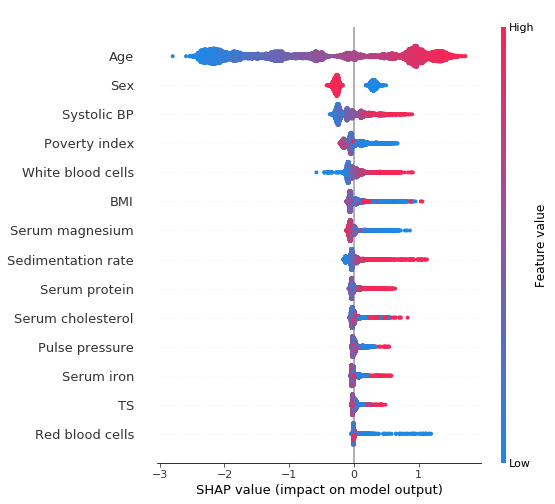

In [8]:
shap.summary_plot(shap_values, X)

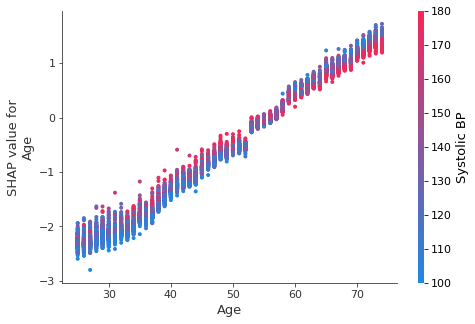

In [9]:
# we pass "Age" instead of an index because dependence_plot() will find it in X's column names for us
# Systolic BP was automatically chosen for coloring based on a potential interaction to check that 
# the interaction is really in the model see SHAP interaction values below
shap.dependence_plot("Age", shap_values, X)

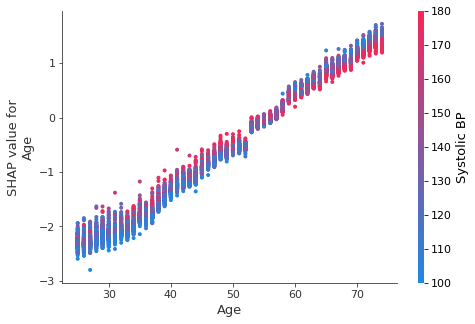

In [10]:
# we pass "Age" instead of an index because dependence_plot() will find it in X's column names for us
# Systolic BP was automatically chosen for coloring based on a potential interaction to check that 
# the interaction is really in the model see SHAP interaction values below
shap.dependence_plot("Age", shap_values, X)

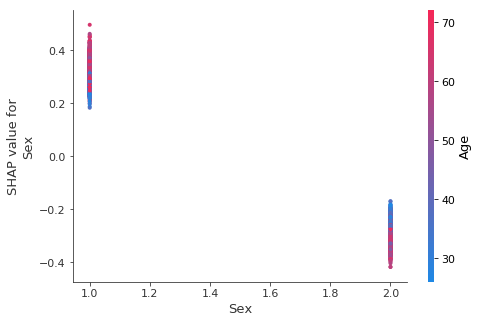

In [12]:
# we pass display_features so we get text display values for sex
shap.dependence_plot("Sex", shap_values, X)

(80, 225)

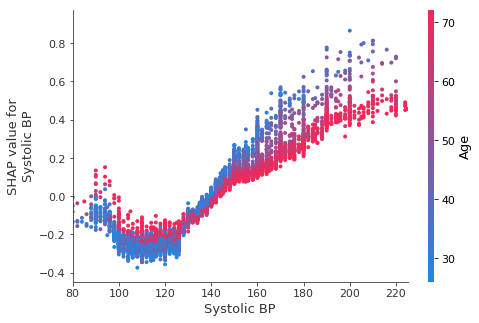

In [13]:
# setting show=False allows us to continue customizing the matplotlib plot before displaying it
shap.dependence_plot("Systolic BP", shap_values, X, show=False)
plt.xlim(80,225)

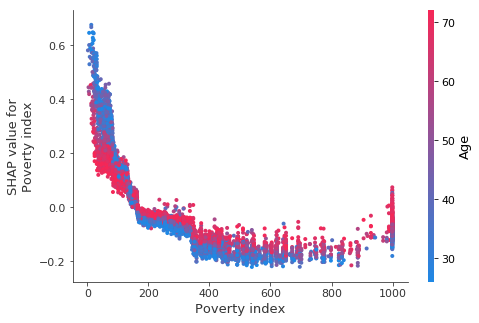

In [14]:
shap.dependence_plot("Poverty index", shap_values, X)

(2, 15)

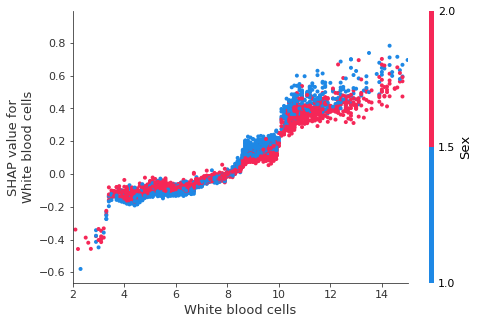

In [17]:
shap.dependence_plot("White blood cells", shap_values, X, show=False)
plt.xlim(2,15)

(15, 50)

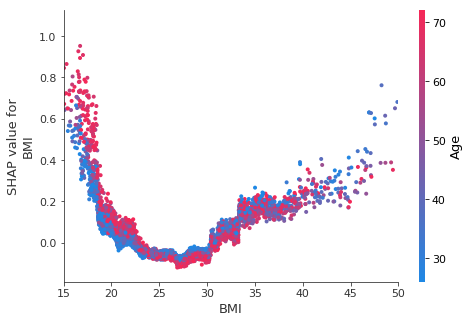

In [18]:
shap.dependence_plot("BMI", shap_values, X, show=False)
plt.xlim(15,50)

(1.2, 2.2)

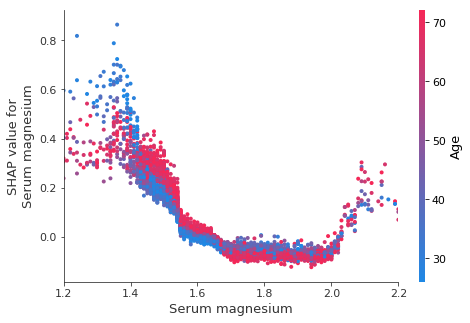

In [19]:
shap.dependence_plot("Serum magnesium", shap_values, X, show=False)
plt.xlim(1.2,2.2)

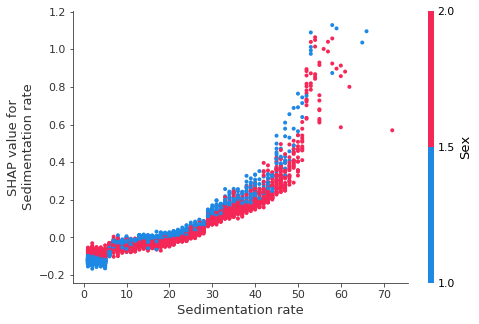

In [20]:
shap.dependence_plot("Sedimentation rate", shap_values, X)

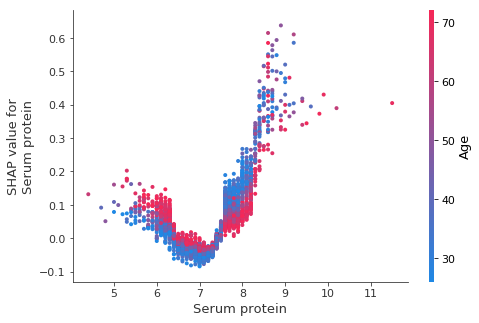

In [21]:
shap.dependence_plot("Serum protein", shap_values, X)

(100, 400)

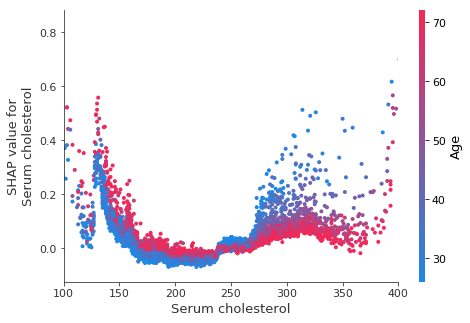

In [22]:
shap.dependence_plot("Serum cholesterol", shap_values, X, show=False)
plt.xlim(100,400)

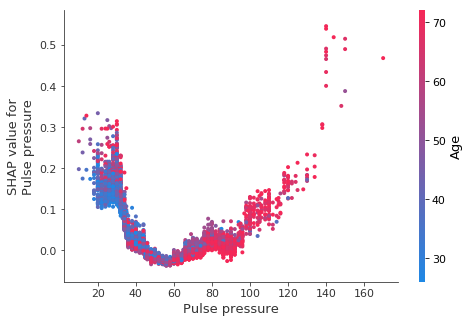

In [23]:
shap.dependence_plot("Pulse pressure", shap_values, X)

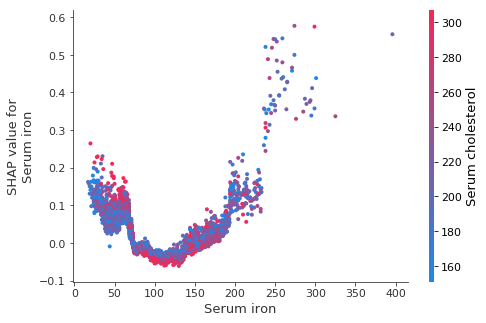

In [24]:
shap.dependence_plot("Serum iron", shap_values, X)

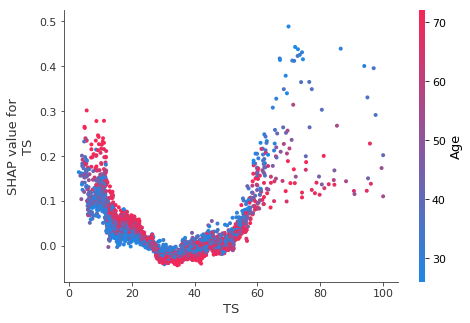

In [25]:
shap.dependence_plot("TS", shap_values, X)

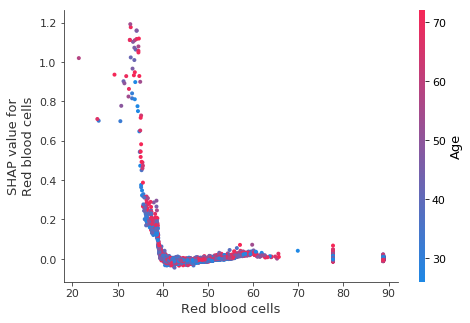

In [26]:
shap.dependence_plot("Red blood cells", shap_values, X)

In [27]:
# takes a couple minutes since SHAP interaction values take a factor of 2 * # features
# more time than SHAP values to compute, since this is just an example we only explain
# the first 2,000 people in order to run quicker
shap_interaction_values = shap.TreeExplainer(model).shap_interaction_values(X.iloc[:2000,:])

In [41]:
X_display,y_display = shap.datasets.nhanesi(display=True)

ValueError: Width and height specified must be non-negative

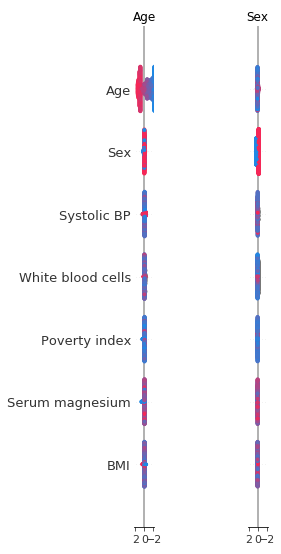

In [42]:
shap.summary_plot(shap_interaction_values, X.iloc[:2000,:])

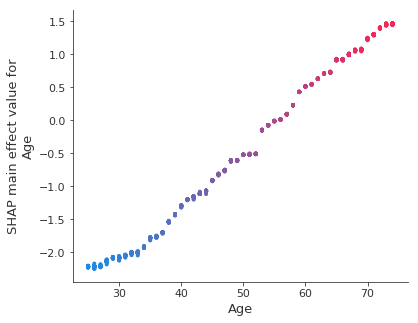

In [43]:
shap.dependence_plot(
    ("Age", "Age"),
    shap_interaction_values, X.iloc[:2000,:],
    display_features=X_display.iloc[:2000,:]
)

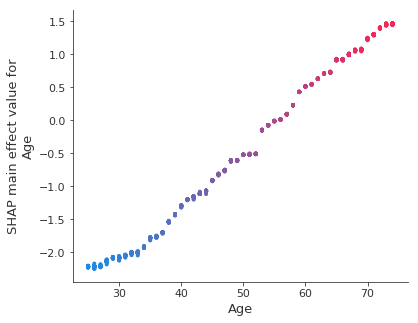

In [30]:
shap.dependence_plot(
    ("Age", "Age"),
    shap_interaction_values, X.iloc[:2000,:],
)


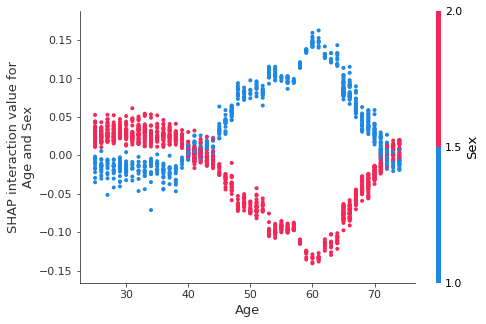

In [31]:


shap.dependence_plot(
    ("Age", "Sex"),
    shap_interaction_values, X.iloc[:2000,:],
)



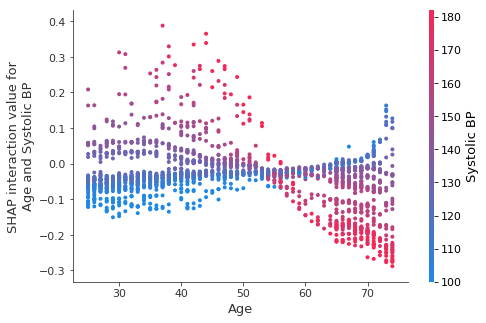

In [32]:
shap.dependence_plot(
    ("Age", "Systolic BP"),
    shap_interaction_values, X.iloc[:2000,:],
)

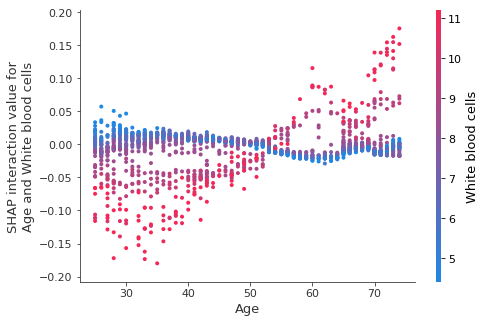

In [33]:
shap.dependence_plot(
    ("Age", "White blood cells"),
    shap_interaction_values, X.iloc[:2000,:],
)

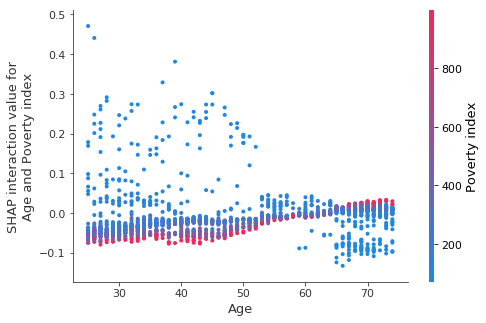

In [34]:
shap.dependence_plot(
    ("Age", "Poverty index"),
    shap_interaction_values, X.iloc[:2000,:],
)


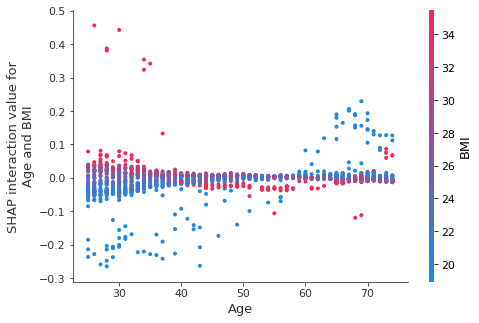

In [35]:


shap.dependence_plot(
    ("Age", "BMI"),
    shap_interaction_values, X.iloc[:2000,:],
)



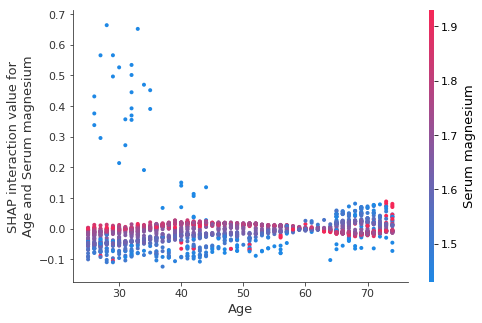

In [36]:


shap.dependence_plot(
    ("Age", "Serum magnesium"),
    shap_interaction_values, X.iloc[:2000,:],
)



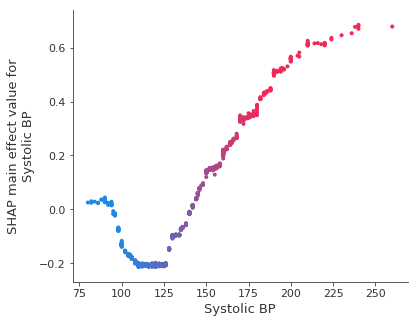

In [37]:
shap.dependence_plot(
    ("Systolic BP", "Systolic BP"),
    shap_interaction_values, X.iloc[:2000,:],
)

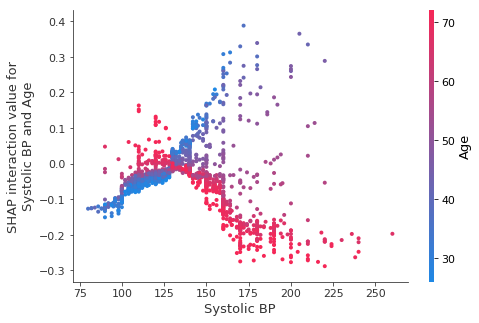

In [38]:
shap.dependence_plot(
    ("Systolic BP", "Age"),
    shap_interaction_values, X.iloc[:2000,:],
)